# Measures branching in C++ from python

This notebooks looks into a couple of ways to write code, which one is efficient, which one is not when it comes to write fast and short loops. Both experiments are around [branching](https://en.wikipedia.org/wiki/Branch_predictor).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## First experiment: comparison C++ syntax

This all started with article [Why is it faster to process a sorted array than an unsorted array?](https://stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array/11227902#11227902). It compares different implementation fo the following function for which we try different implementations for the third line in next cell. The last option is taken
[Checking whether a number is positive or negative using bitwise operators](https://stackoverflow.com/questions/3779202/checking-whether-a-number-is-positive-or-negative-using-bitwise-operators) which avoids [branching](https://en.wikipedia.org/wiki/Branch_predictor).

In [3]:
# int nb = 0;
# for(auto it = values.begin(); it != values.end(); ++it)
#     if (*it >= th) nb++; // this line changes
#     if (*it >= th) nb++; // and is repeated 10 times inside the loop.
#     // ... 10 times
# return nb;

The third line is also repeated 10 times to avoid the loop being too significant. The code is available on github: [cbenchmark.cpp](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/cbenchmark.cpp) and
[repeat_fct.h](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/repeat_fct.h).

In [4]:
from cpyquickhelper.numbers.cbenchmark import measure_scenario_A, measure_scenario_B
from cpyquickhelper.numbers.cbenchmark import measure_scenario_C, measure_scenario_D
from cpyquickhelper.numbers.cbenchmark import measure_scenario_E, measure_scenario_F
from cpyquickhelper.numbers.cbenchmark import measure_scenario_G, measure_scenario_H
from cpyquickhelper.numbers.cbenchmark import measure_scenario_I, measure_scenario_J

In [5]:
import pandas

def test_benchmark(label, values, th, repeat=10, number=20):
    funcs = [(k, v) for k, v in globals().copy().items() if k.startswith("measure_scenario")]
    rows = []
    for k, v in funcs:
        exe = v(values, th, repeat, number)
        d = exe.todict()
        d['doc'] = v.__doc__.split('``')[1]
        d['label'] = label
        d['name'] = k
        rows.append(d)        
    df = pandas.DataFrame(rows)
    return df

test_benchmark("sorted", list(range(10)), 5)

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,5.926000e-07,5.926001e-07,if (values[i] >= th) ++nb;,sorted,1.186000e-06,1.185000e-06,measure_scenario_A,20.0,10.0
1,1.461700e-06,4.054160e-06,if (*it >= th) ++nb;,sorted,1.896300e-05,7.900000e-07,measure_scenario_B,20.0,10.0
2,5.136000e-07,5.315074e-07,if (*it >= th) nb++;,sorted,1.186000e-06,7.900000e-07,measure_scenario_C,20.0,10.0
3,9.875000e-08,1.710400e-07,nb += *it >= th ? 1 : 0;,sorted,3.950000e-07,0.000000e+00,measure_scenario_D,20.0,10.0
4,5.136000e-07,5.315074e-07,if (*it >= th) nb += 1;,sorted,1.186000e-06,7.900000e-07,measure_scenario_E,20.0,10.0
5,1.185500e-07,1.810882e-07,nb += (*it - th) >= 0 ? 1 : 0;,sorted,3.960000e-07,0.000000e+00,measure_scenario_F,20.0,10.0
6,7.704000e-07,2.909942e-06,nb += (*it - th) < 0 ? 1 : 0;,sorted,1.343300e-05,0.000000e+00,measure_scenario_G,20.0,10.0
7,9.875000e-08,1.710400e-07,nb += *it < th ? 1 : 0;,sorted,3.950000e-07,0.000000e+00,measure_scenario_H,20.0,10.0
8,5.925000e-08,1.410432e-07,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,3.950000e-07,0.000000e+00,measure_scenario_I,20.0,10.0
9,5.925000e-08,1.410432e-07,nb += values[i] >= th ? 1 : 0;,sorted,3.950000e-07,0.000000e+00,measure_scenario_J,20.0,10.0


Times are not very conclusive on such small lists.

In [6]:
values = list(range(100000))
df_sorted = test_benchmark("sorted", values, len(values)//2, repeat=200)
df_sorted

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.135869,NaN,if (values[i] >= th) ++nb;,sorted,0.015047,0.013123,measure_scenario_A,20.0,200.0
1,0.134045,NaN,if (*it >= th) ++nb;,sorted,0.014404,0.013069,measure_scenario_B,20.0,200.0
2,0.134212,NaN,if (*it >= th) nb++;,sorted,0.014494,0.013137,measure_scenario_C,20.0,200.0
3,0.012844,NaN,nb += *it >= th ? 1 : 0;,sorted,0.001738,0.001153,measure_scenario_D,20.0,200.0
4,0.134172,NaN,if (*it >= th) nb += 1;,sorted,0.014605,0.013085,measure_scenario_E,20.0,200.0
5,0.015875,NaN,nb += (*it - th) >= 0 ? 1 : 0;,sorted,0.002473,0.001512,measure_scenario_F,20.0,200.0
6,0.014354,NaN,nb += (*it - th) < 0 ? 1 : 0;,sorted,0.001598,0.001392,measure_scenario_G,20.0,200.0
7,0.010048,NaN,nb += *it < th ? 1 : 0;,sorted,0.001273,0.000973,measure_scenario_H,20.0,200.0
8,0.016442,NaN,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,0.002211,0.001555,measure_scenario_I,20.0,200.0
9,0.014729,NaN,nb += values[i] >= th ? 1 : 0;,sorted,0.001675,0.001404,measure_scenario_J,20.0,200.0


The article some implementations will be slower if the values are not sorted.

In [7]:
import random
random.shuffle(values)
values[:10]

[90698, 4105, 40283, 13640, 634, 97734, 57933, 26645, 40155, 49004]

In [8]:
df_shuffled = test_benchmark("shuffled", values, len(values)//2, repeat=200)
df_shuffled

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.134160,NaN,if (values[i] >= th) ++nb;,shuffled,0.016999,0.013054,measure_scenario_A,20.0,200.0
1,0.134120,NaN,if (*it >= th) ++nb;,shuffled,0.014206,0.013052,measure_scenario_B,20.0,200.0
2,0.133985,NaN,if (*it >= th) nb++;,shuffled,0.014391,0.013090,measure_scenario_C,20.0,200.0
3,0.012777,NaN,nb += *it >= th ? 1 : 0;,shuffled,0.001499,0.001152,measure_scenario_D,20.0,200.0
4,0.135891,NaN,if (*it >= th) nb += 1;,shuffled,0.016132,0.013128,measure_scenario_E,20.0,200.0
5,0.015934,NaN,nb += (*it - th) >= 0 ? 1 : 0;,shuffled,0.001794,0.001512,measure_scenario_F,20.0,200.0
6,0.015071,NaN,nb += (*it - th) < 0 ? 1 : 0;,shuffled,0.002265,0.001392,measure_scenario_G,20.0,200.0
7,0.010243,NaN,nb += *it < th ? 1 : 0;,shuffled,0.001408,0.000973,measure_scenario_H,20.0,200.0
8,0.016243,NaN,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,shuffled,0.001796,0.001558,measure_scenario_I,20.0,200.0
9,0.014711,NaN,nb += values[i] >= th ? 1 : 0;,shuffled,0.001635,0.001399,measure_scenario_J,20.0,200.0


In [9]:
df = pandas.concat([df_sorted, df_shuffled])
dfg = df[["doc", "label", "average"]].pivot("doc", "label", "average")

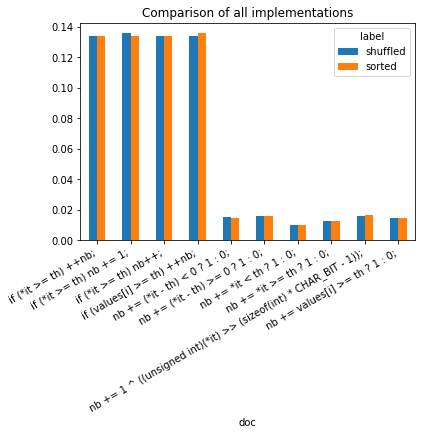

In [10]:
ax = dfg.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of all implementations");

It seems that inline tests (``cond ? value1 : value2``) do not stop the branching and it should be used whenever possible.

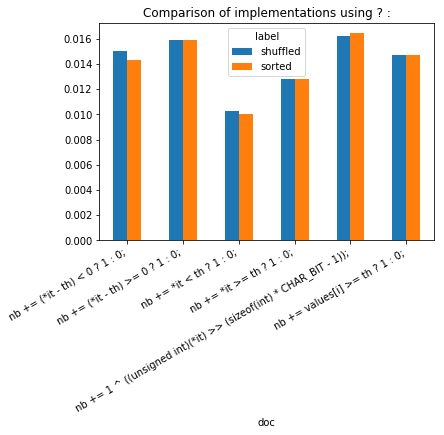

In [11]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('[?^]')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of implementations using ? :");

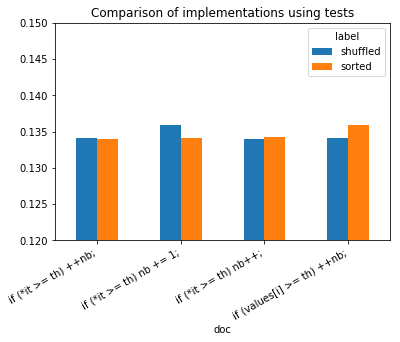

In [12]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('if')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_ylim([0.12, 0.15])
ax.set_title("Comparison of implementations using tests");

*sorted*, *not sorted* does not seem to have a real impact in this case. It shows *branching* really slows down the execution of a program. Branching happens whenever the program meets a loop condition or a test. Iterator ``*it`` are faster than accessing an array with notation ``[i]`` which adds a cost due to an extra addition.

## Second experiment: dot product

The goal is to compare the dot product from [numpy.dot](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html) and a couple of implementation in C++.

In [13]:
%matplotlib inline

In [14]:
import numpy

def simple_dot(values):
    return numpy.dot(values, values)

values = list(range(10000000))
values = numpy.array(values, dtype=numpy.float32)
vect = values / numpy.max(values)
simple_dot(vect)

3333333.2

In [15]:
vect.dtype

dtype('float32')

In [16]:
from timeit import Timer

def measure_time(stmt, context, repeat=10, number=50):
    tim = Timer(stmt, globals=context)
    res = numpy.array(tim.repeat(repeat=repeat, number=number))
    mean = numpy.mean(res)
    dev = numpy.mean(res ** 2)
    dev = (dev - mean**2) ** 0.5
    return dict(average=mean, deviation=dev, min_exec=numpy.min(res),
                max_exec=numpy.max(res), repeat=repeat, number=number,
                size=context['values'].shape[0])

measure_time("simple_dot(values)", context=dict(simple_dot=simple_dot, values=vect))

{'average': 0.08977780929999994,
 'deviation': 0.011939801614769822,
 'min_exec': 0.08073053300000055,
 'max_exec': 0.12474953099999908,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [17]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("simple_dot(values)", repeat=100,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
dot = pandas.DataFrame(res)
dot.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.000689,0.000018,0.000772,0.000679,50,100,187510
76,0.000699,0.000012,0.000750,0.000691,50,100,190010
77,0.000693,0.000021,0.000780,0.000676,50,100,192510
78,0.000772,0.000104,0.001050,0.000715,50,100,195010
79,0.000792,0.000123,0.001220,0.000696,50,100,197510


In [18]:
res = []
for i in range(100000, 10000000, 1000000):
    t = measure_time("simple_dot(values)", repeat=10,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)
    
huge_dot = pandas.DataFrame(res)
huge_dot.head()

,average,deviation,max_exec,min_exec,number,repeat,size
0,0.001090,0.000536,0.002010,0.000520,50,10,100000
1,0.009636,0.005231,0.024124,0.004691,50,10,1100000
2,0.015633,0.001288,0.019161,0.014145,50,10,2100000
3,0.023959,0.001804,0.028175,0.022146,50,10,3100000
4,0.032866,0.001459,0.035682,0.031164,50,10,4100000


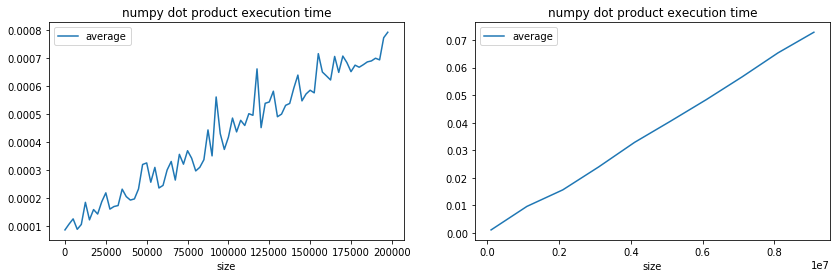

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0])
huge_dot.plot(x='size', y="average", ax=ax[1])
ax[0].set_title("numpy dot product execution time");
ax[1].set_title("numpy dot product execution time");

Now the custom implementation. We start with an empty function to get a sense of the cost due to to pybind11.

In [20]:
from cpyquickhelper.numbers.cbenchmark import empty_vector_dot_product
empty_vector_dot_product(vect, vect)

0.0

In [21]:
def empty_c11_dot(vect):
    return empty_vector_dot_product(vect, vect)

measure_time("empty_c11_dot(values)", context=dict(empty_c11_dot=empty_c11_dot, values=vect), repeat=10)

{'average': 0.00015367919999889068,
 'deviation': 6.798044867135164e-05,
 'min_exec': 9.639499999991585e-05,
 'max_exec': 0.00034528399999800286,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

Very small. It should not pollute our experiments.

In [22]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product
vector_dot_product(vect, vect)

3334629.0

In [23]:
def c11_dot(vect):
    return vector_dot_product(vect, vect)

measure_time("c11_dot(values)", context=dict(c11_dot=c11_dot, values=vect), repeat=10)

{'average': 0.6921877270999992,
 'deviation': 0.0020896441251178513,
 'min_exec': 0.6886832109999972,
 'max_exec': 0.6949915609999948,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [24]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot(values)", repeat=10,
                     context=dict(c11_dot=c11_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
cus_dot = pandas.DataFrame(res)
cus_dot.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.012761,0.000143,0.013049,0.012442,50,10,187510
76,0.012719,0.000119,0.012931,0.012568,50,10,190010
77,0.012840,0.000060,0.012958,0.012742,50,10,192510
78,0.012989,0.000069,0.013119,0.012890,50,10,195010
79,0.013226,0.000098,0.013436,0.013059,50,10,197510


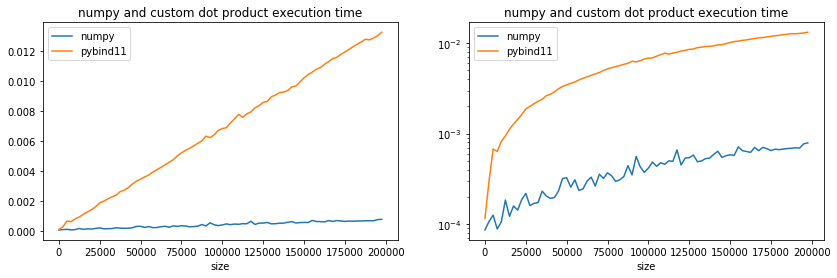

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

Pretty slow. Let's see what it does to compute dot product 16 by 16.

In [26]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16
vector_dot_product16(vect, vect)

3333331.75

In [27]:
def c11_dot16(vect):
    return vector_dot_product16(vect, vect)

measure_time("c11_dot16(values)", context=dict(c11_dot16=c11_dot16, values=vect), repeat=10)

{'average': 0.3218175382999995,
 'deviation': 0.006153465704659649,
 'min_exec': 0.31566405200000247,
 'max_exec': 0.33637162399999454,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [28]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16(values)", repeat=10,
                     context=dict(c11_dot16=c11_dot16, values=vect[:i].copy()))
    res.append(t)

cus_dot16 = pandas.DataFrame(res)
cus_dot16.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.005482,0.000059,0.005623,0.005390,50,10,187510
76,0.005573,0.000049,0.005647,0.005461,50,10,190010
77,0.005647,0.000097,0.005892,0.005543,50,10,192510
78,0.006533,0.000996,0.008361,0.005662,50,10,195010
79,0.005885,0.000065,0.006034,0.005811,50,10,197510


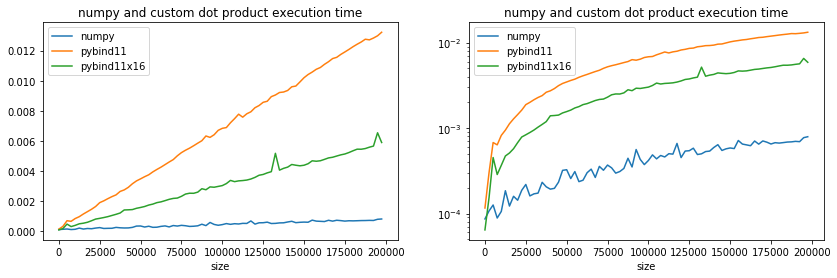

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

We are far from *numpy* but the branching has clearly a huge impact and the fact the loop condition is evaluated only every 16 iterations does not explain this gain. Next experiment with [SSE](https://fr.wikipedia.org/wiki/Streaming_SIMD_Extensions) instructions.

In [30]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16_sse
vector_dot_product16_sse(vect, vect)

3333332.0

In [31]:
def c11_dot16_sse(vect):
    return vector_dot_product16_sse(vect, vect)

measure_time("c11_dot16_sse(values)", context=dict(c11_dot16_sse=c11_dot16_sse, values=vect), repeat=10)

{'average': 0.14032947380000066,
 'deviation': 0.003421190915140355,
 'min_exec': 0.13728247800000304,
 'max_exec': 0.14819764800000002,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [32]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_sse(values)", repeat=10,
                     context=dict(c11_dot16_sse=c11_dot16_sse, values=vect[:i].copy()))
    res.append(t)

cus_dot16_sse = pandas.DataFrame(res)
cus_dot16_sse.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.001833,0.000019,0.001864,0.001803,50,10,187510
76,0.001867,0.000032,0.001939,0.001816,50,10,190010
77,0.001878,0.000013,0.001898,0.001856,50,10,192510
78,0.001895,0.000020,0.001926,0.001856,50,10,195010
79,0.001950,0.000040,0.002041,0.001899,50,10,197510


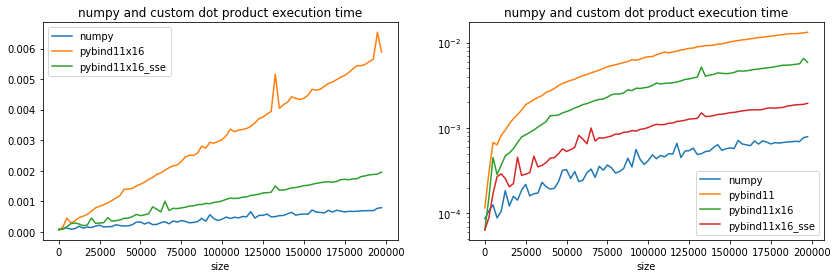

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[0], label="pybind11x16_sse")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[1], label="pybind11x16_sse")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

Better even though it is still 4 times slower than *numpy*.

Last experiment with [AVX 512](https://fr.wikipedia.org/wiki/Advanced_Vector_Extensions) instructions but it does not work on all processor.

In [34]:
import platform
platform.processor()

'Intel64 Family 6 Model 78 Stepping 3, GenuineIntel'

In [35]:
import numpy
values = numpy.array(list(range(10000000)), dtype=numpy.float32)
vect = values / numpy.max(values)

In [36]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16_avx512
vector_dot_product16_avx512(vect, vect)

3333332.0

In [37]:
def c11_dot16_avx512(vect):
    return vector_dot_product16_avx512(vect, vect)

measure_time("c11_dot16_avx512(values)",
             context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect), repeat=10)

{'average': 0.1470533113000009,
 'deviation': 0.019361733707331998,
 'min_exec': 0.13718134300000173,
 'max_exec': 0.20421072900000325,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [38]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_avx512(values)", repeat=10,
                     context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect[:i].copy()))
    res.append(t)

cus_dot16_avx512 = pandas.DataFrame(res)
cus_dot16_avx512.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.001914,0.000034,0.002006,0.001886,50,10,187510
76,0.001925,0.000023,0.001964,0.001876,50,10,190010
77,0.001960,0.000023,0.002010,0.001937,50,10,192510
78,0.001989,0.000045,0.002109,0.001955,50,10,195010
79,0.001993,0.000014,0.002031,0.001979,50,10,197510


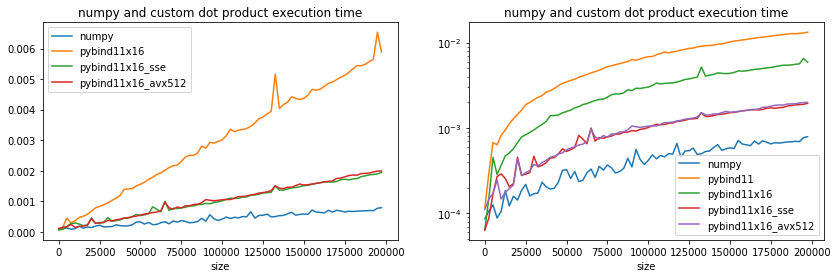

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[0], label="pybind11x16_sse")
cus_dot16_avx512.plot(x='size', y="average", ax=ax[0], label="pybind11x16_avx512")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[1], label="pybind11x16_sse")
cus_dot16_avx512.plot(x='size', y="average", ax=ax[1], label="pybind11x16_avx512")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

If the time is the same, it means that options AVX512 are not available.

In [40]:
from cpyquickhelper.numbers.cbenchmark import get_simd_available_option
get_simd_available_option()

'Available options:  __SSE__ __SSE2__ __SSE3__ __SSE4_1__'